In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',sep=',',header=None)

In [3]:
df.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
df=df.rename(columns={0:'ClassName',1:'LeftWeight',2:'LeftDistance',3:'RightWeight',4:'RightDistance'})

In [5]:
df.head()

,ClassName,LeftWeight,LeftDistance,RightWeight,RightDistance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [6]:
df.shape

(625, 5)

In [7]:
df.isnull().any()

ClassName        False
LeftWeight       False
LeftDistance     False
RightWeight      False
RightDistance    False
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
ClassName        625 non-null object
LeftWeight       625 non-null int64
LeftDistance     625 non-null int64
RightWeight      625 non-null int64
RightDistance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [9]:
df.describe()

,LeftWeight,LeftDistance,RightWeight,RightDistance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


# Univariate Analysis

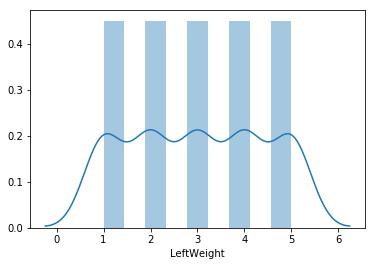

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(df['LeftWeight'])
plt.show()

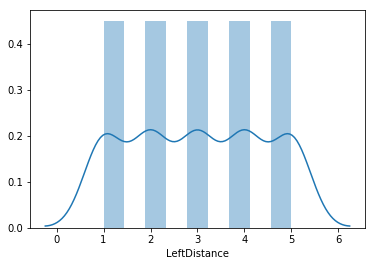

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(df['LeftDistance'])
plt.show()

# Bivariate Analysis

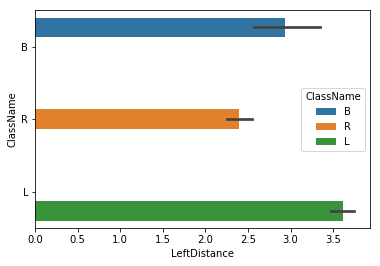

In [12]:
sns.barplot(x='LeftDistance', y='ClassName', hue='ClassName', data=df)

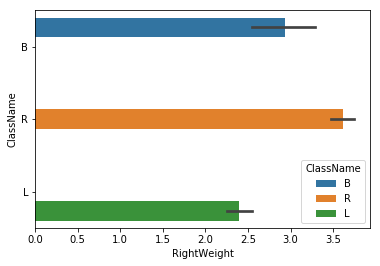

In [13]:
sns.barplot(x='RightWeight', y='ClassName', hue='ClassName', data=df)

In [14]:
#RightDistance associated with class
df.groupby(['ClassName']).agg({'RightDistance': 'sum'}).sort_values(by= 'RightDistance', ascending = False).head()

,RightDistance
ClassName,
R,1040
L,691
B,144


# Heatmap

In [16]:
#One hot encoding
df1 = df[['ClassName']]
df1 = pd.concat([df,pd.get_dummies(df['ClassName'])], axis=1)
df1.drop(['ClassName'], axis=1, inplace=True)

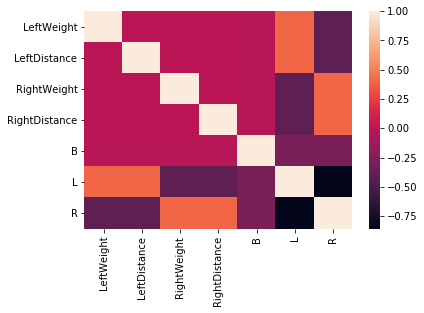

In [17]:
heat_map = sns.heatmap(df1.corr())

# Removing outliers

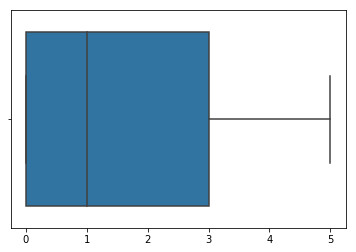

In [71]:
sns.boxplot(df1)

# Modeling

In [21]:
#set seed for reproducibility
seed = 4
np.random.seed(seed)

In [49]:
#define model with 3 hidden layers of 10 nodes and relu as activation function
# and use MSE as loss metrics and adam as optimizer
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [63]:
#split dataset in target values and features
X=df.iloc[:,1:]
y=df1.iloc[:,-3:]

In [65]:
y.head()

,B,L,R
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [41]:
X.head()

,LeftWeight,LeftDistance,RightWeight,RightDistance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [67]:
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
# fit scaler with train data
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train model
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
437/437 [==============================] - 0s 562us/step - loss: 0.3013
Epoch 2/100
437/437 [==============================] - 0s 80us/step - loss: 0.2404
Epoch 3/100
437/437 [==============================] - 0s 105us/step - loss: 0.2019
Epoch 4/100
437/437 [==============================] - 0s 80us/step - loss: 0.1774
Epoch 5/100
437/437 [==============================] - 0s 94us/step - loss: 0.1610
Epoch 6/100
437/437 [==============================] - 0s 92us/step - loss: 0.1490
Epoch 7/100
437/437 [==============================] - 0s 80us/step - loss: 0.1395
Epoch 8/100
437/437 [==============================] - 0s 92us/step - loss: 0.1318
Epoch 9/100
437/437 [==============================] - 0s 98us/step - loss: 0.1255
Epoch 10/100
437/437 [==============================] - 0s 82us/step - loss: 0.1198
Epoch 11/100
437/437 [==============================] - 0s 101us/step - loss: 0.1145
Epoch 12/100
437/437 [==============================] - 0s 98us/step - loss: 0.109

In [72]:
#perform evaluation on train and test set
y_train_predicted = model.predict(X_train_scaled)
y_test_predicted = model.predict(X_test_scaled)

MSE_train = mean_squared_error(y_train, y_train_predicted)
MSE_test = mean_squared_error(y_test, y_test_predicted)

print('MSE on train set = {}'.format(MSE_train))
print('MSE on test set = {}'. format(MSE_test))

MSE on train set = 0.03417876735329628
MSE on test set = 0.03937513381242752


In [73]:
model.save("Balance_data")